In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/ECE 657 Project

/content/drive/My Drive/ECE 657 Project


In [ ]:
'''DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"'''
data = pd.read_csv('great-data.csv')

In [ ]:
data.head()

,target,text
0,4,@indykitty *hug indykitty* sleep tight indy...
1,0,@Shough yeah I feel really bad for them tryin...
2,0,@embeep sorry about your sadness I'll be home...
3,0,Couldn't spend time with the family cuz of wor...
4,4,is new on twitter


In [ ]:
#data = data.rename(columns= {'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at':'product', 'is_there_an_emotion_directed_at_a_brand_or_product':'label'})

In [ ]:
'''data = data.drop(columns=['product'])
data.head()'''

"data = data.drop(columns=['product'])\ndata.head()"

In [ ]:
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
data['target'].value_counts()

4    25000
0    25000
Name: target, dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('stopwords')
stop = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
        'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
        'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
        'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
        'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
        'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',  'only', 'own', 'same', 
        'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',  'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
removed = ['no', 'nor', 'not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S"
spcl_char_re = "[^A-Za-z0-9]+"
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(spcl_char_re, ' ', text)
    tokens = []
    for token in text.split():
        if token not in stop:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# cleaning text
data['clean_text'] = data.text.apply(lambda x: preprocess(x))

In [ ]:
data.head(10)

,target,text,clean_text
0,4,@indykitty *hug indykitty* sleep tight indy...,hug indykitty sleep tight indy
1,0,@Shough yeah I feel really bad for them tryin...,yeah feel really bad trying best help don know...
2,0,@embeep sorry about your sadness I'll be home...,sorry sadness home next weeked faff stalk cele...
3,0,Couldn't spend time with the family cuz of wor...,couldn spend time family cuz work went beach w...
4,4,is new on twitter,new twitter
5,4,just want you all to kno how amazing Jesus is....,want kno amazing jesus
6,0,@FollowKayleigh AAwww.. Xd.. you wasn't in his...,aawww xd wasn live chat yesterday ha going stu...
7,4,"welp, bedtime for me guys. night",welp bedtime guys night
8,0,@iceicebabyice yo I have been not following yo...,yo not following mistake longest still not
9,4,Three more days.,three days


In [ ]:
'''data = data[data['label'] != "I can't tell"]
data['label'].value_counts()'''

'data = data[data[\'label\'] != "I can\'t tell"]\ndata[\'label\'].value_counts()'

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)
data_val, data_test = train_test_split(data_test, test_size = 0.5, random_state = 42)
print("TRAIN size:", len(data_train))
print("VAL size:", len(data_val))
print("TEST size:", len(data_val))

TRAIN size: 40000
VAL size: 5000
TEST size: 5000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# document vectors
X_train = vectorizer.fit_transform(data_train['clean_text'])
X_val = vectorizer.transform(data_val['clean_text'])
X_test = vectorizer.transform(data_test['clean_text'])
len(vectorizer.get_feature_names())

30857

In [ ]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(100, random_state= 42)
X_train_new = svd.fit_transform(X_train)
X_val_new = svd.transform(X_val)
X_test_new = svd.transform(X_test)

In [ ]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17086 sha256=687f9e548467b7d6b5448367bbc92d537fdca30c97def5cbcd73ee16581fe13f
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [ ]:
import SimpSOM as sps

In [ ]:
raw_data = X_train_new
#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(20, 20, raw_data, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 10000)

#Save the weights to file
net.save('small_data')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


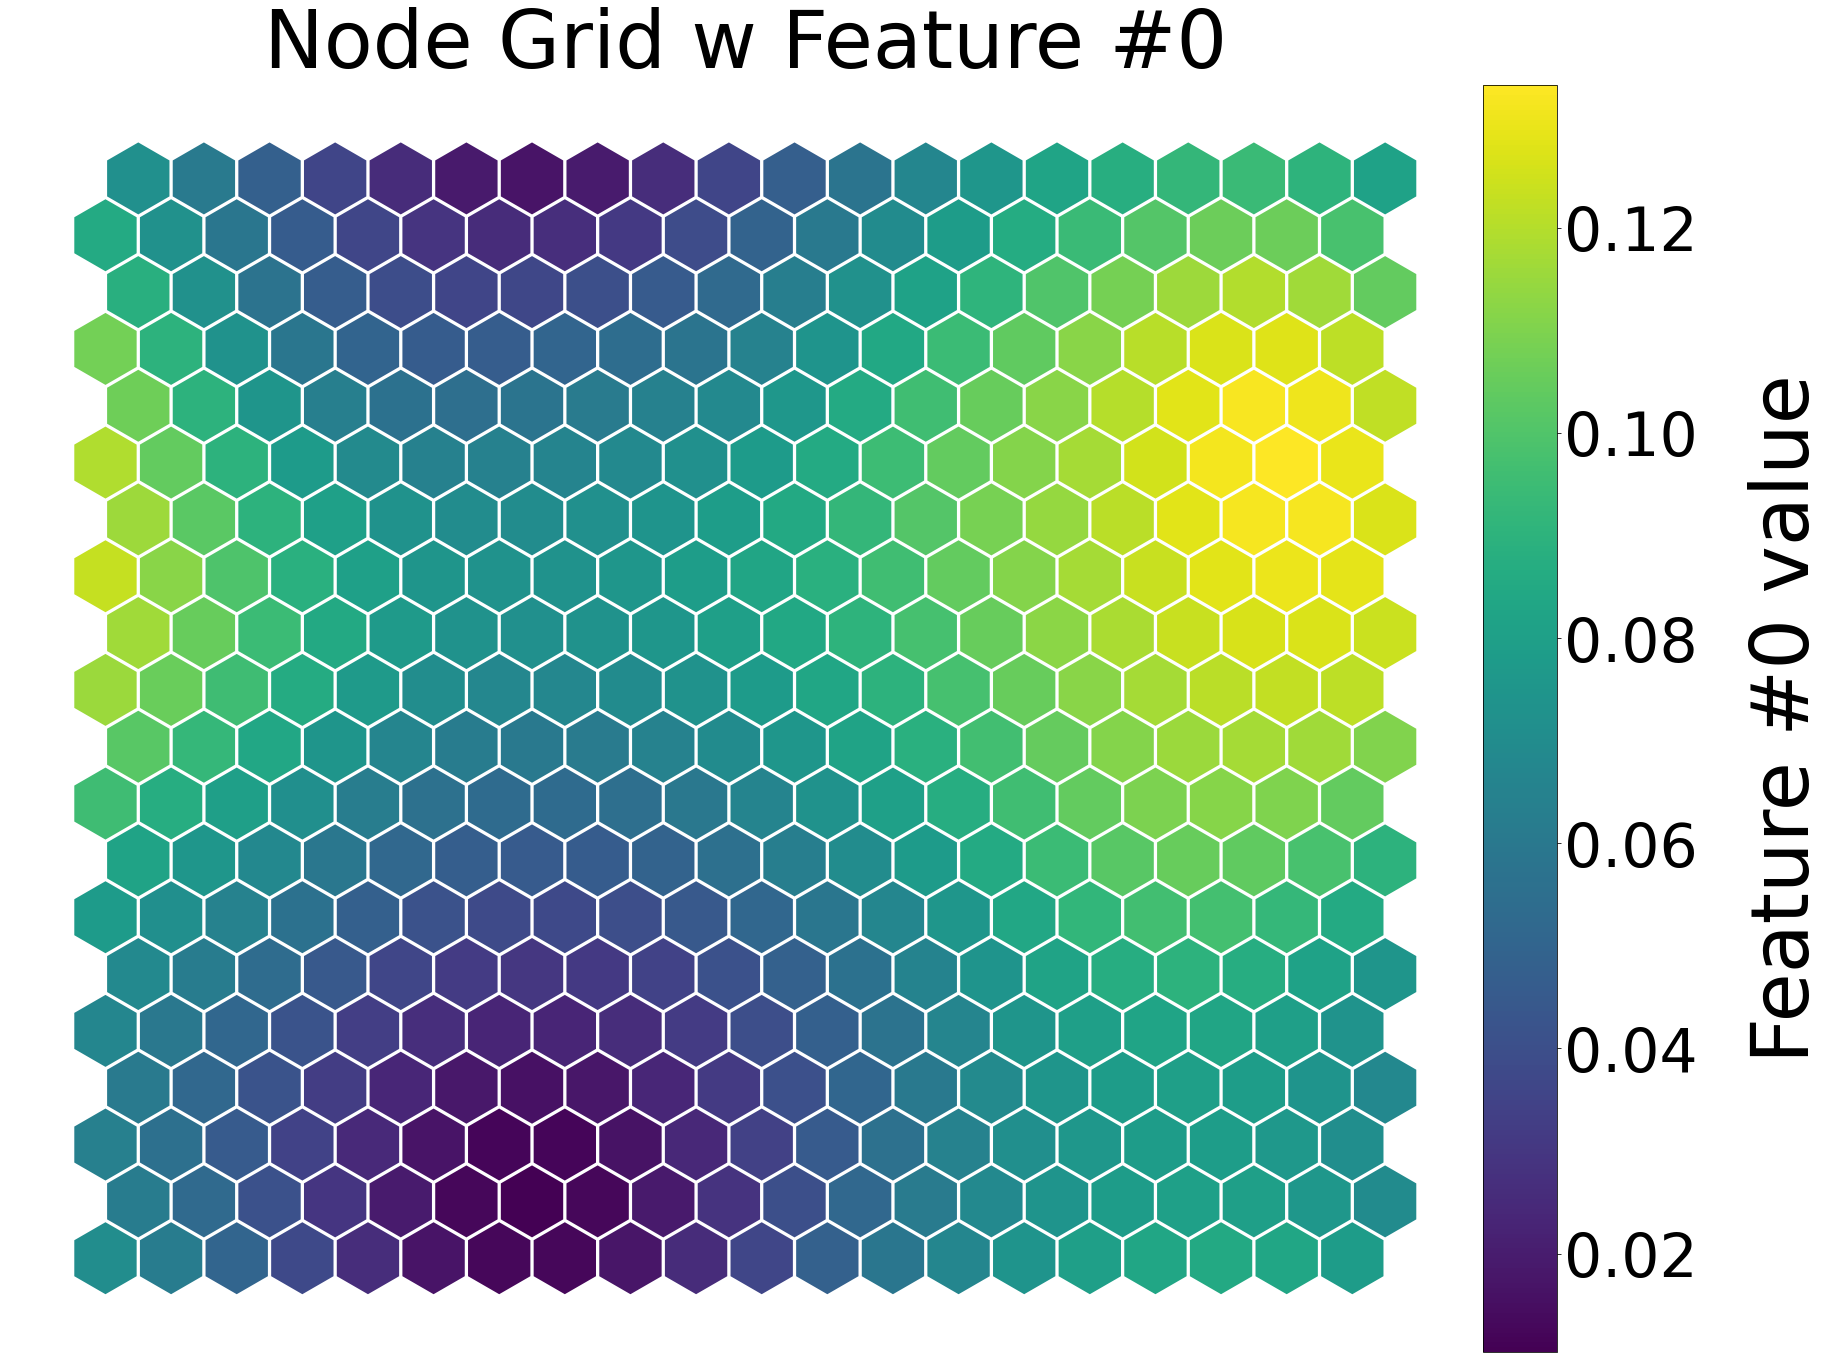

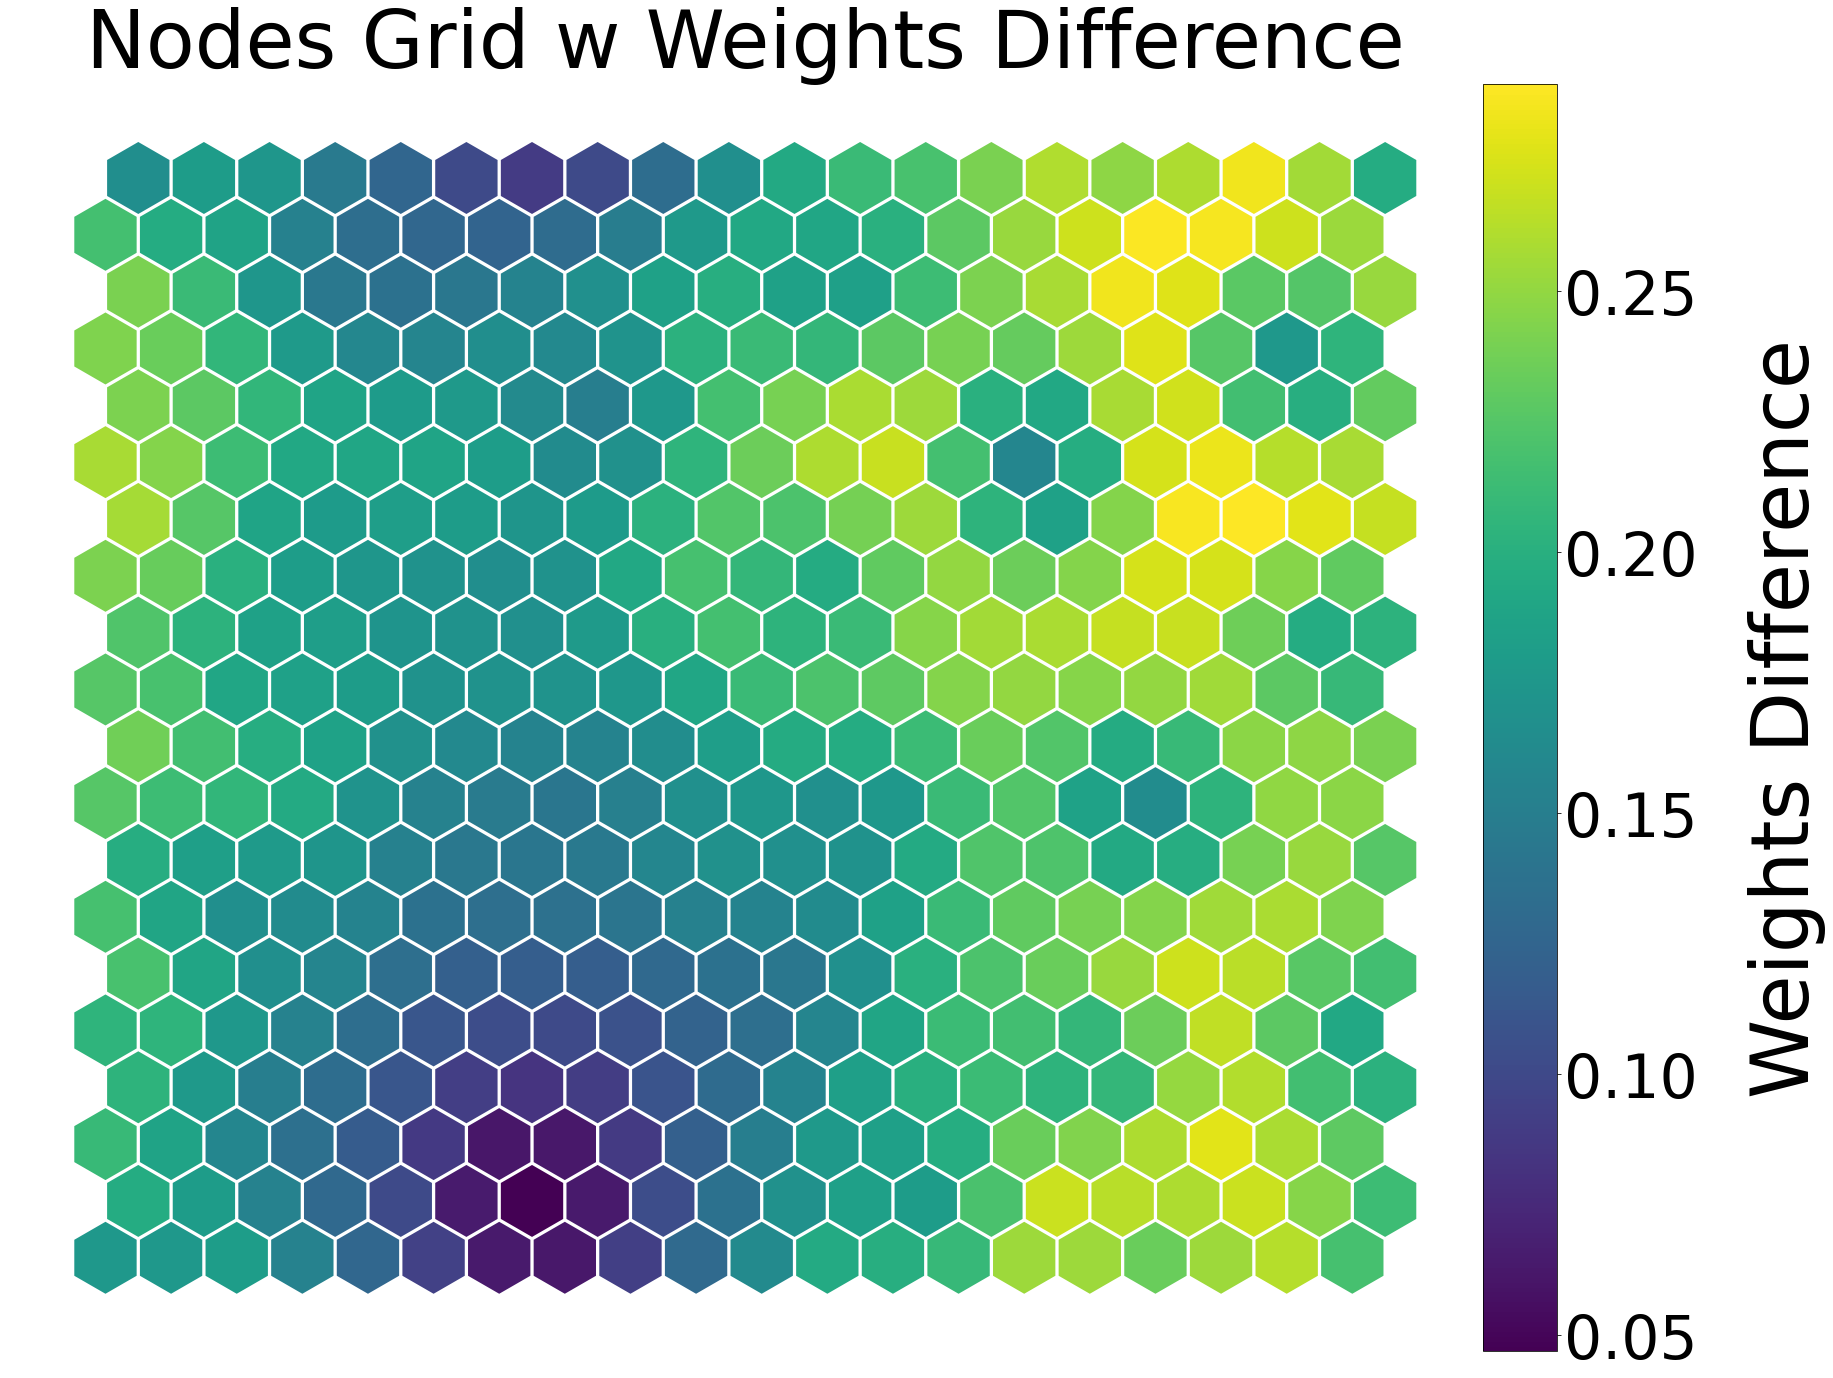

In [ ]:
#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0, path = './som_small/')
net.diff_graph(path = './som_small/')

In [ ]:
y_train = [1 if y == 4 else 0 for y in data_train['target']]
y_train = np.array(y_train)

y_val = np.array([1 if y == 4 else 0 for y in data_val['target']])
y_test = np.array([1 if y == 4 else 0 for y in data_test['target']])

In [ ]:
projected_som = net.project(raw_data, labels=y_train)

<Figure size 432x288 with 0 Axes>

In [ ]:
import pickle
pickle.dump(projected_som, open( "projected_som.pkl", "wb" ) )


In [ ]:
projected_som

[[18.5, 9.526279441628825],
 [2, 5.196152422706632],
 [19, 3.4641016151377553],
 [4.5, 12.99038105676658],
 [7.5, 4.330127018922194],
 [8, 13.856406460551021],
 [19.5, 9.526279441628825],
 [19, 3.4641016151377553],
 [4.5, 12.99038105676658],
 [7, 3.4641016151377553],
 [17, 13.856406460551021],
 [19.5, 0.8660254037844388],
 [7, 1.7320508075688776],
 [19, 3.4641016151377553],
 [14, 12.124355652982143],
 [11, 10.392304845413264],
 [7.5, 14.722431864335457],
 [2, 8.660254037844387],
 [17.5, 14.722431864335457],
 [7.5, 2.598076211353316],
 [5.5, 14.722431864335457],
 [6.5, 0.8660254037844388],
 [9, 8.660254037844387],
 [6.5, 0.8660254037844388],
 [2.5, 11.258330249197702],
 [12, 5.196152422706632],
 [4, 10.392304845413264],
 [4, 0.0],
 [8.5, 14.722431864335457],
 [6.5, 16.454482671904337],
 [6.5, 0.8660254037844388],
 [15.5, 2.598076211353316],
 [12, 6.9282032302755105],
 [11.5, 14.722431864335457],
 [9, 8.660254037844387],
 [11, 5.196152422706632],
 [10, 3.4641016151377553],
 [7.5, 12.9903

In [ ]:
#Cluster the datapoints according to the Quality Threshold algorithm.
#net.cluster(raw_data, type='qthresh')

In [ ]:
type(projected_som)

list

In [ ]:
df_projected = pd.DataFrame(columns=['p1', 'p2', 'label'])
p1 = []
p2 = []
for i in projected_som:
  p1.append(i[0])
  p2.append(i[1])

In [ ]:
df_projected['p1'] = p1
df_projected['p2'] = p2
df_projected['label'] = y_train

In [ ]:
df_projected.to_csv('som_20x20_100.csv')

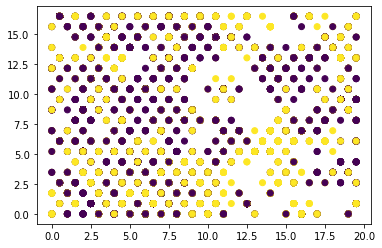

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x = df_projected['p1'], y = df_projected['p2'], c=df_projected['label'])

In [ ]:
#Project the datapoints on the new 2D network map.
proj_val = net.project(X_val_new, labels=y_val)

<Figure size 432x288 with 0 Axes>

In [ ]:
proj_test = net.project(X_test_new, labels = y_test)

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')

In [ ]:
col = df_projected.columns

x = df_projected[['p1', 'p2']].values
x

array([[18.5       ,  9.52627944],
       [ 2.        ,  5.19615242],
       [19.        ,  3.46410162],
       ...,
       [ 6.5       ,  0.8660254 ],
       [ 7.        , 10.39230485],
       [11.5       , 14.72243186]])

In [ ]:
X_train_svm = clf.fit(df_projected[['p1', 'p2']].values, np.ravel(df_projected['label']))

In [ ]:
from sklearn.metrics import  accuracy_score
y_pred_val = clf.predict(np.array(proj_val))
acc_val = accuracy_score(y_true = y_val, y_pred = y_pred_val)
acc_val

0.5914

In [ ]:
y_pred_test = clf.predict(np.array(proj_test))
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
acc_test

0.5942